**Step 1:**
- Sign in to the GMail ID that you have enrolled in the training program with.
    - You will have to enter your password.
    - You might also be asked to verify the login on your phone/other device."

**Step 2:**
- After signing in, make a copy of the question sheet.
- Rename this copy to "Your_Name_OLA-15_Pareto_Analysis"
- Start your work."

**Note:** Do not close the sheet you are working on. It cannot be opened again and you will have to start from the beginning.

**Step 3:**

1) Read the case and complete the task listed below:

Fabel Garments, a renowned clothing brand, is facing an increase in customer complaints related to its products. In response to this challenge, the management has tasked the customer service team with conducting a Pareto analysis to identify the primary concerns contributing to customer dissatisfaction.

The objective is to analyze the available data, concentrating on key garment categories and the main drivers of complaints. By pinpointing the most significant issues, Fabel Garments aims to implement actionable recommendations that will enhance operational efficiency and elevate the overall customer experience. The ultimate goal is to reduce complaints, improve product quality, and strengthen customer loyalty in the competitive fashion industry.



**Task 1**



Set Up Colab environment for Python
Import Pandas and matplotlib.pyplot libraries
Read the CSV file and create a data frame named “fabel_garments”

CSV File: https://raw.githubusercontent.com/Invact-Abhay/DOE11/refs/heads/main/Fabel%20Garments.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
fabel_garments=pd.read_csv(" https://raw.githubusercontent.com/Invact-Abhay/DOE11/refs/heads/main/Fabel%20Garments.csv")

**Task 2**

Show the first 5 rows of data frame “fabel_garments”’


In [ ]:
fabel_garments.head()

,TransactionID,ProductName,Reason,Price/Unit,UnitSold,SalesValue,Returns
0,56021,Saree,Misleading Info,2527,5,12635,1
1,56033,Kurta,Defective Product,866,8,6928,2
2,56045,Kurta,Wrong Size,237,6,1422,1
3,56057,Kurta,Defective Product,225,10,2250,2
4,56069,Lehenga,Wrong Size,5324,3,15972,1


**Task 3**

Create a table to show the total number of complaints for each product.

Assign the result to a variable named: total_return


In [ ]:
total_return=fabel_garments.groupby("ProductName")["Returns"].sum()
total_return

,Returns
ProductName,
Blazers,23
Churidars,71
Dupatta,5
Jeans,90
Kurta,483
Lehenga,55
Palazzo Pants,86
Salwar Kameez,82
Saree,94


**Task 4**

Sort the above table in descending order.

Assign the result to a variable named: sorted_return


In [ ]:
sorted_return=total_return.sort_values(ascending=False)
sorted_return

,Returns
ProductName,
Kurta,483
Shirt,384
Saree,94
Tunic Top,91
Jeans,90
Palazzo Pants,86
Salwar Kameez,82
Churidars,71
Sherwani,69


**Task 5**

Calculate the cumulative sum of returns from the above sorted_return table.

Assign the result to a variable named: cumulative_sum


In [ ]:
cumulative_sum=sorted_return.cumsum()
cumulative_sum

,Returns
ProductName,
Kurta,483
Shirt,867
Saree,961
Tunic Top,1052
Jeans,1142
Palazzo Pants,1228
Salwar Kameez,1310
Churidars,1381
Sherwani,1450


**Task 6**

Calculate the percentage of returns for each product based on the total returns from the cumulative_sum table.

Assign the result to a variable named:  cumulative_percentage.

The value should be shown with two decimal places.


In [ ]:
cumulative_percentage=round(cumulative_sum/sorted_return.sum()*100,2)
cumulative_percentage

,Returns
ProductName,
Kurta,30.65
Shirt,55.01
Saree,60.98
Tunic Top,66.75
Jeans,72.46
Palazzo Pants,77.92
Salwar Kameez,83.12
Churidars,87.63
Sherwani,92.01


**Task 7**

Create a Pareto analysis chart for product returns using a bar graph for returns and a line graph for cumulative percentage. Name the chart as "Pareto Analysis of Product Return".



Text(0.5, 1.0, 'Pareto Analysis of Product Return')

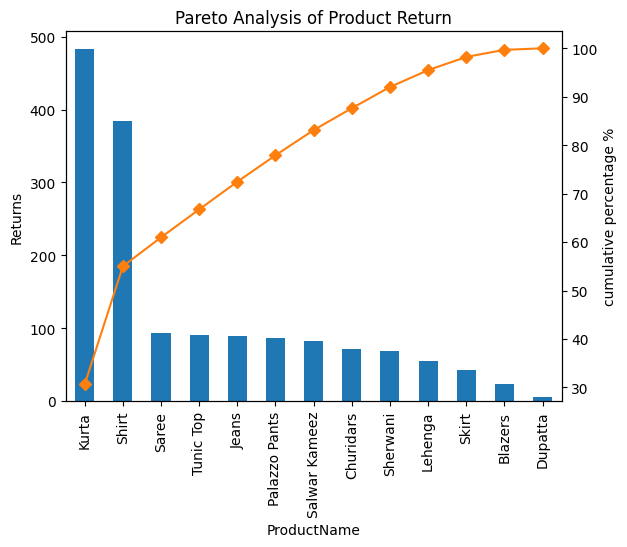

In [ ]:
fig, ax1 =plt.subplots()
sorted_return.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Returns')

ax2 = ax1.twinx()
cumulative_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('cumulative percentage %')
plt.title('Pareto Analysis of Product Return')

**Task 8**

Filter the details of products that account for 55.01% of the returns.

Assign the result to a variable named:  top_returns


In [ ]:
top_returns=fabel_garments.query('ProductName in ["Kurta","Shirt"]')
top_returns

,TransactionID,ProductName,Reason,Price/Unit,UnitSold,SalesValue,Returns
1,56033,Kurta,Defective Product,866,8,6928,2
2,56045,Kurta,Wrong Size,237,6,1422,1
3,56057,Kurta,Defective Product,225,10,2250,2
5,56081,Kurta,Misleading Info,2193,10,21930,1
12,56165,Shirt,Defective Product,16184,5,80920,2
...,...,...,...,...,...,...,...
1466,73613,Shirt,Poor Quality,1268,7,8876,1
1467,73625,Kurta,Defective Product,1037,3,3111,1
1468,73637,Shirt,Poor Quality,8696,10,86960,1
1469,73649,Kurta,Defective Product,1482,1,1482,1


**Task 9**

Create a table to summarize the total returns by reason from the top_returns DataFrame, and sort this table in descending order.

Assign it to a variable named return_reason.


In [ ]:
return_reason=top_returns.groupby("Reason")["Returns"].sum().sort_values(ascending=False)
return_reason

,Returns
Reason,
Defective Product,555
Misleading Info,245
Poor Quality,30
Color Issues,18
Wrong Size,10
Wrong Material,9


**Task 10**

Calculate the cumulative percentage from the return_reason DataFrame.

Assign it to a variable named: cumulative_reason_percentage.



In [ ]:
cumulative_reason_percentage=round(return_reason.cumsum()/return_reason.sum()*100,2)
cumulative_reason_percentage

,Returns
Reason,
Defective Product,64.01
Misleading Info,92.27
Poor Quality,95.73
Color Issues,97.81
Wrong Size,98.96
Wrong Material,100.00


**Task 11**

Create a Pareto analysis chart showing the reasons for product returns, with a bar graph for the return counts and a line graph for the cumulative percentage. Name the chart as "Pareto Analysis: Reasons for Product Returns".

Text(0.5, 1.0, 'Pareto Analysis: Reasons for Product Returns')

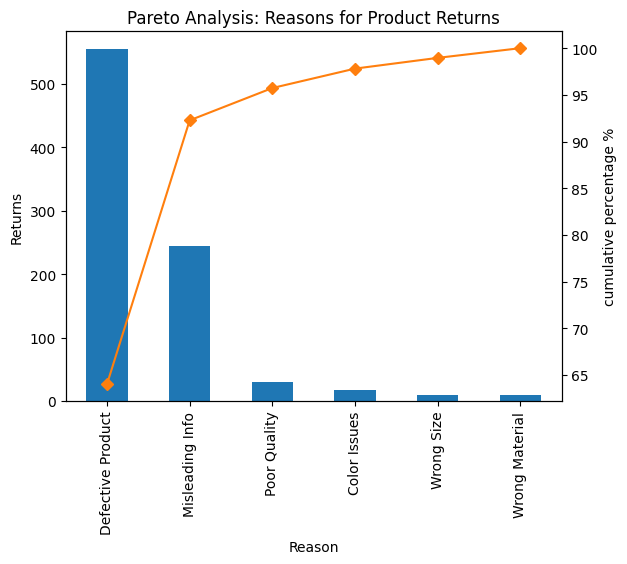

In [ ]:
fig, ax1 =plt.subplots()
return_reason.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Returns')

ax2 = ax1.twinx()
cumulative_reason_percentage.plot(kind='line',color='C1',marker='D')
ax2.set_ylabel('cumulative percentage %')
plt.title('Pareto Analysis: Reasons for Product Returns')

**Step 4:**

Once done, go to Share --> Restricted --> Access to Anyone with the Link --> Editor --> Copy the Link.



**Step 5:**

Paste the link in the Google Form given below and submit within the deadline.
Make sure you are ready to submit and have copied the Sheet Link with Editor access before opening the form.

Form: https://forms.gle/FDncwVig1JyoVtqHA

When you click the form above, two messages will appear. Please select the first message.
When you click the form above, two messages will appear. Please select the first message.

 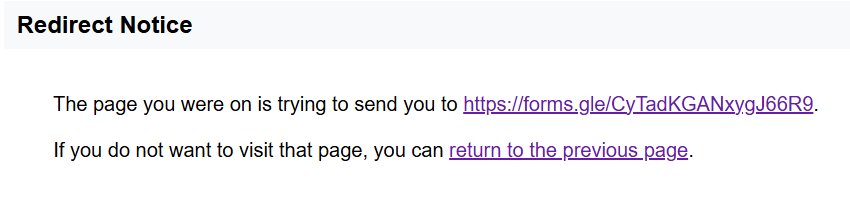



**Step 6:**

You can close the exam by clicking the power button in the bottom-right corner.

The password to quit is: invact@1